## Visualizing Convolution Neural Networks using Pytorch
https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e

In this article, we will look at two different types of visualization techniques such as :

- Visualizing learned filter weights.
- Performing occlusion experiments on the image.

These methods help us to understand what does filter learn? what kind of images cause certain neurons to fire? and how good are the hidden representations of the input image?.

## Receptive Field of Neuron
Before we go ahead and visualize the working of Convolution Neural Network, we will discuss the receptive field of filters present in the CNN’s.

Consider that we have a two-layered Convolution Neural Network and we are using 3x3 filters through the network. The centered pixel marked in the yellow present in Layer 2 is actually the result of applying convolution operation on the center pixel present in Layer 1 (by using 3x3 kernels and stride = 1). Similarly, the center pixel present in Layer 3 is a result of applying convolution operation on the center pixel present in Layer 2.

<img src="imgs/visualization.png" alt="Drawing" style="width: 400px;"/>

The receptive field of a neuron is defined as the region in the input image that can influence the neuron in a convolution layer i.e…how many pixels in the original image are influencing the neuron present in a convolution layer.


It is clear that the central pixel in Layer 3 depends on the 3x3 neighborhood of the previous layer (Layer 2). The 9 successive pixels (marked in pink) present in Layer 2 including the central pixel corresponds to the 5x5 region in Layer 1. As we go deeper and deeper in the network the pixels at the deeper layers will have a high receptive field i.e… the region of interest with respect to the original image would be larger.

<img src="imgs/visualization001.png" alt="Drawing" style="width: 600px;"/>

From the above image, we can observe that the highlighted pixel present in the second convolution layer has a high receptive field with respect to the original input image.

### Visualization of CNN Layers and Filters

To visualize the working of CNN, we will explore two commonly used methods to understand how the neural network learns the complex relationships.

- Filter visualization with a pre-trained model.
- Occlusion analysis with a pre-trained model.

In this article, we will use a small subset of the ImageNet dataset with 1000 categories to visualize the filters of the model.

## Outline
1. Using torchvision.datasets with a custom folder of images
2. Occlusion analysis with pretrained model
3. Filter visualisation with pretrained model

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch 
import torch.nn as nn
import torchvision
#import datasets in torchvision
import torchvision.datasets as datasets

#import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms

## Load dataset


In [6]:
#reading the labels of data we uploaded
with open("data/imagenet_labels.txt") as f:
    classes = eval(f.read())

In [7]:
print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [8]:
#defining the transformations for the data
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    #normalize the images with imagenet data mean and std
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [9]:
#define the data we uploaded as evaluation data and apply the transformations
evalset = torchvision.datasets.ImageFolder(root = "./data/imagenet", transform = transform)

In [10]:
#create a data loader for evaluation
batch_size=1 #batch size
evalloader = torch.utils.data.DataLoader(evalset, batch_size = batch_size, shuffle = True)

In [11]:
#looking at data using iter

dataiter = iter(evalloader)
images, labels = dataiter.next()

#shape of images bunch
print(images.shape)
#shape of single image in a bunch
print(images[0].shape)

#label of the image
print(labels[0].item())

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])
0


## Load pretrained model

In [12]:
#for visualization we will use vgg16 pretrained on imagenet data

model = models.vgg16(pretrained=True)

In [13]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Visualise image

In [15]:
def imshow(img, title):
  
  """Custom function to display the image using matplotlib"""
  
  #define std correction to be made
  std_correction = np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1)
  
  #define mean correction to be made
  mean_correction = np.asarray([0.485, 0.456, 0.406]).reshape(3, 1, 1)
  
  #convert the tensor img to numpy img and de normalize 
  npimg = np.multiply(img.numpy(), std_correction) + mean_correction
  
  #plot the numpy image
  plt.figure(figsize = (batch_size * 4, 4))
  plt.axis("off")
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.title(title)
  plt.show()

The function imshow takes two arguments — image in tensor and the title of the image. First, we will perform the inverse normalization of the image with respect to the ImageNet mean and standard deviation values. After that, we will use matplotlib to display the image.

In [16]:
#custom function to fetch images from dataloader

def show_batch_images(dataloader):
  images,_ = next(iter(dataloader))
  
  #run the model on the images
  outputs = model(images)
  
  #get the maximum class 
  _, pred = torch.max(outputs.data, 1)
  
  #make grid
  img = torchvision.utils.make_grid(images)
  
  #call the function
  imshow(img, title=[classes[x.item()] for x in pred])
  
  return images, pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


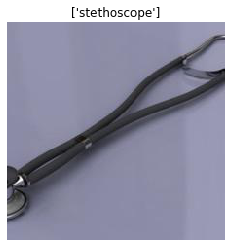

In [17]:
images, pred = show_batch_images(evalloader)

## Occlusion analysis

In [18]:
#running inference on the images without occlusion

#vgg16 pretrained model
outputs = model(images)
print(outputs.shape)

#passing the outputs through softmax to interpret them as probability
outputs = nn.functional.softmax(outputs, dim = 1)

#getting the maximum predicted label
prob_no_occ, pred = torch.max(outputs.data, 1)

#get the first item
prob_no_occ = prob_no_occ[0].item()

print(prob_no_occ)

torch.Size([1, 1000])
0.9432645440101624


In [19]:
#custom function to conduct occlusion experiments

def occlusion(model, image, label, occ_size = 50, occ_stride = 50, occ_pixel = 0.5):
  
    #get the width and height of the image
    width, height = image.shape[-2], image.shape[-1]
  
    #setting the output image width and height
    output_height = int(np.ceil((height-occ_size)/occ_stride))
    output_width = int(np.ceil((width-occ_size)/occ_stride))
  
    #create a white image of sizes we defined
    heatmap = torch.zeros((output_height, output_width))
    
    #iterate all the pixels in each column
    for h in range(0, height):
        for w in range(0, width):
            
            h_start = h*occ_stride
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)
            
            if (w_end) >= width or (h_end) >= height:
                continue
            
            input_image = image.clone().detach()
            
            #replacing all the pixel information in the image with occ_pixel(grey) in the specified location
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel
            
            #run inference on modified image
            output = model(input_image)
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label]
            
            #setting the heatmap location to probability value
            heatmap[h, w] = prob 

    return heatmap

In [20]:
heatmap = occlusion(model, images, pred[0].item(), 32, 14)

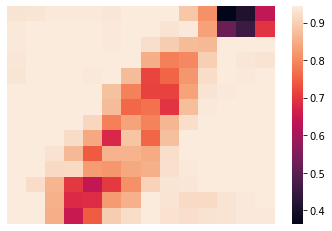

In [21]:
#displaying the image using seaborn heatmap and also setting the maximum value of gradient to probability
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)
figure = imgplot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

### Filter Visualization

By visualizing the filters of the trained model, we can understand how CNN learns the complex Spatial and Temporal pixel dependencies present in the image.

## What does a filter capture?

Consider that we have 2D input of size 4x4 and we are applying a filter of 2x2 (marked in red) on the image starting from the top left corner of the image. As we slide the kernel over the image from left to right and top to bottom to perform a convolution operation we would get an output that is smaller than the size of the input.

<img src="imgs/visualization002.png" alt="Drawing" style="width: 400px;"/>

The output at each convolution operation (like h₁₄) is equal to the dot product of the input vector and a weight vector. We know that the dot product between the two vectors is proportional to the cosine of the angle between vectors.
<img src="imgs/visualization003.png" alt="Drawing" style="width: 400px;"/>

During convolution operation, certain parts of the input image like the portion of the image containing the face of a dog might give high value when we apply a filter on top of it. In the above example, let’s discuss in what kind of scenarios our output h₁₄ will be high?.

The output h₁₄ would be high if the cosine value between the vectors is high i.e… cosine value should be equal to 1. If the cosine angle is equal to 1 then we know the angle between the vectors is equal to 0⁰. That means both input vector (portion of the image) X and the weight vector W are in the same direction the neuron is going to fire maximally.

<img src="imgs/visualization004.png" alt="Drawing" style="width: 300px;"/>

The neuron h₁₄ will fire maximally when the input X (a portion of the image for convolution) is equal to the unit vector or a multiple of the unit vector in the direction of the filter vector W.

In other words, we can think of a filter as an image. As we slide the filter over the input from left to right and top to bottom whenever the filter coincides with a similar portion of the input, the neuron will fire. For all other parts of the input image that doesn’t align with the filter, the output will be low. This is the reason we call the kernel or weight matrix as a filter because it filters out portions of the input image that doesn’t align with the filter.

To understand what kind of patters does the filter learns, we can just plot the filter i.e… weights associated with the filter. For filter visualization, we will use Alexnet pre-trained with the ImageNet data set.

In [24]:
#alexnet pretrained with imagenet data
#import model zoo in torchvision
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/kundan/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
10.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

25.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

39.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.i

In [25]:
#structure of the alexnet
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [26]:
def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
    
    
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

Alexnet contains 5 convolutional layers and 3 fully connected layers. ReLU is applied after every convolution operation. Remember that in convolution operation for 3D (RGB) images, there is no movement of kernel along with the depth since both kernel and image are of the same depth. We will visualize these filters (kernel) in two ways.

- Visualizing each filter by combing three channels as an RGB image.
- Visualizing each channel in a filter independently using a heatmap.

The main function to plot the weights is plot_weights. The function takes 4 parameters,
model — Alexnet model or any trained model
layer_num — Convolution Layer number to visualize the weights
single_channel — Visualization mode
collated — Applicable for single-channel visualization only.

In [27]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [28]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [29]:
def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

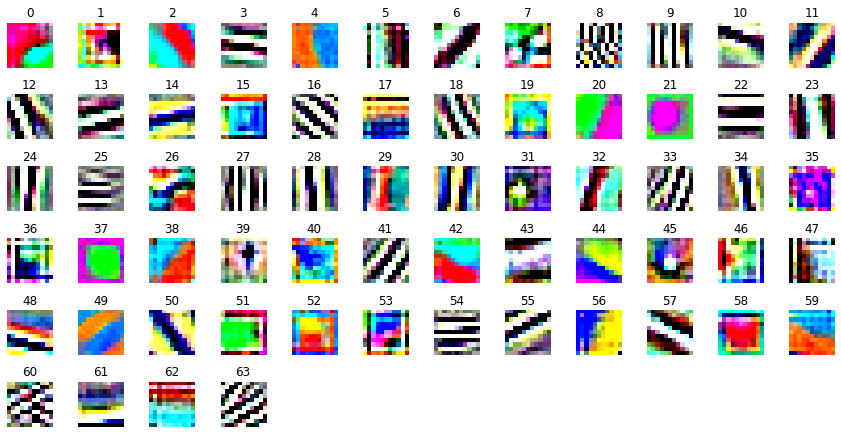

In [32]:
#visualize weights for alexnet - first conv layer

plot_weights(alexnet, 0, single_channel = False)

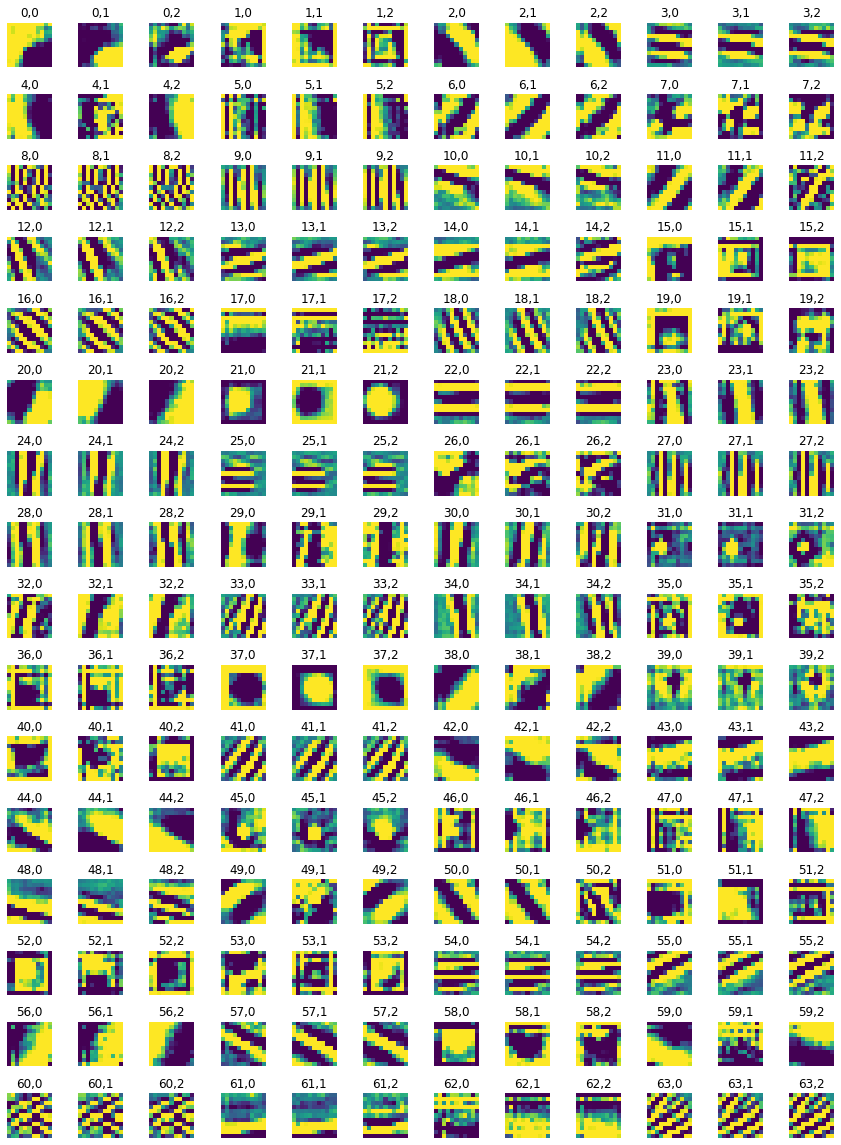

In [33]:
#plotting single channel images

plot_weights(alexnet, 0, single_channel = True)

In the plot_weights function, we take our trained model and read the layer present at that layer number. In Alexnet (Pytorch model zoo) first convolution layer is represented with a layer index of zero. Once we extract the layer associated with that index, we will check whether the layer is the convolution layer or not. Since we can only visualize layers which are convolutional. After validating the layer index, we will extract the learned weight data present in that layer.

In [35]:
#plot for 3rd layer -> 2nd conv layer
plot_weights(alexnet, 3, single_channel = True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f666f5ca620> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plot_weights(alexnet, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

In [ ]:
#for vgg16

plot_weights(model, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 2, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 5, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 0, single_channel = False, collated = False)